# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [4]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [5]:
#Cargamos dataset a utilizar
df_car = pd.read_csv ('/content/car_evaluation.csv', sep = ',', header= None)
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Análisis exploratorio de datos

In [6]:
#Visualizacion del dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [7]:

#Analizamos el shape del objeto
df_car.shape

(1728, 7)

In [8]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint','doors', 'persons', 'lug_bot', 'safety', 'class' ]
df_car.columns = col_names

In [9]:
#Vericamos la transformacion
df_car.head(10)

,buying,maint,doors,persons,lug_bot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [10]:
#Visualizamos los tipos de datos
df_car.dtypes

buying     object
maint      object
doors      object
persons    object
lug_bot    object
safety     object
class      object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [11]:
# Exploremos un poco mas la variable target
df_car ['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [12]:
#Verificamos valores missings
df_car.isnull().sum()

buying     0
maint      0
doors      0
persons    0
lug_bot    0
safety     0
class      0
dtype: int64

## Procesamiento de datos

In [13]:
#Separamos en X e y
X = df_car.drop (['class'], axis=1 )
Y = df_car['class']

In [14]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split


#30% para test y 70% para train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=45, stratify = Y)

In [15]:
#Veamos que obtuvimos
X_train.shape , X_test.shape

((1209, 6), (519, 6))

In [16]:
Y_train.shape, Y_test.shape

((1209,), (519,))

In [17]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_bot,safety
1610,low,med,5more,4,big,high
1580,low,med,4,4,med,high
731,high,med,5more,2,small,high
795,high,low,3,4,med,low
273,vhigh,med,4,2,med,low


In [18]:
X_train.dtypes

buying     object
maint      object
doors      object
persons    object
lug_bot    object
safety     object
dtype: object

In [19]:
Y_train.value_counts()

unacc    847
acc      269
good      48
vgood     45
Name: class, dtype: int64

## Entrenamiento de modelo de clasificación con árbol de decisión

In [20]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
!pip install category-encoders
import category_encoders as ce


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [21]:
cols = ['buying', 'maint', 'doors', 'persons','lug_bot', 'safety']
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_bot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
#Verificamos la transformacion
X_train.head ()

,buying,maint,doors,persons,lug_bot,safety
1610,1,1,1,1,1,1
1580,1,1,2,1,2,1
731,2,1,1,2,3,1
795,2,2,3,1,2,2
273,3,1,2,2,2,2


In [23]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2 , random_state= 0)

In [24]:
#Entrenamiento
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [25]:
#Calculo de las predicciones en Train y Test
Y_train_pred_tree = tree.predict(X_train)
Y_test_pred_tree = tree.predict(X_test)

## Evaluación de modelo de clasificación con árbol de decisión

In [26]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score (Y_train, Y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score (Y_test, Y_test_pred_tree)

print ('El accuracy en train es:',train_accuracy_tree)
print('El accuracy en test es:',test_accuracy_tree )

El accuracy en train es: 0.7444168734491315
El accuracy en test es: 0.7360308285163777


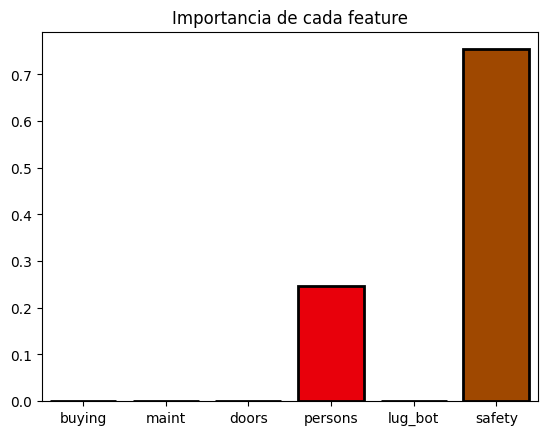

In [27]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data,
            palette = 'bright',
            saturation = 2.0,
            edgecolor = 'black',
            linewidth = 2)
plt.title('Importancia de cada feature')
plt.show()


## Entrenamiento de modelo de clasificación con random forest

In [29]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit (X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [32]:
#Calculo de las predicciones en Train y Test
Y_train_pred_rf = rf.predict (X_train)
Y_test_pred_rf = rf.predict (X_test)

## Evaluación de modelo de clasificación con random forest

In [34]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf =accuracy_score(Y_train, Y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf =accuracy_score(Y_test, Y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.


El accuracy en train es: 0.9975186104218362
El accuracy en test es: 0.9441233140655106


In [38]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores


safety     0.259625
persons    0.238876
buying     0.185102
maint      0.136210
lug_bot    0.101182
doors      0.079005
dtype: float64

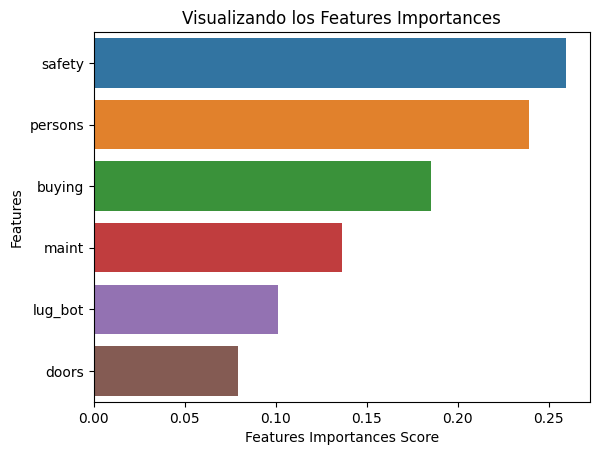

In [40]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot (x=features_scores ,y= features_scores.index)
plt.xlabel ("Features Importances Score")
plt.ylabel ("Features")
plt.title ("Visualizando los Features Importances")
plt.show ()

In [45]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_test_pred_rf)
print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[102   2  11   0]
 [  5  16   0   0]
 [  9   1 353   0]
 [  1   0   0  19]]


In [47]:
#RF
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.87      0.89      0.88       115
        good       0.84      0.76      0.80        21
       unacc       0.97      0.97      0.97       363
       vgood       1.00      0.95      0.97        20

    accuracy                           0.94       519
   macro avg       0.92      0.89      0.91       519
weighted avg       0.94      0.94      0.94       519

